# Гравитационная система стабилизации наноспутника формата CubeSat

## Уравнения движения
Получим уравнения движения спутника массой $m$, движущегося по круговой орбите высоты $h$ в центральном поле тяготения, представимого в виде упргой ассиметричной гантели жескостью $c$ с диссипативной вязкой силой с коэффициентом трения $\beta$, действущей на груз массы $\alpha m$ в направлении продольной оси системы.

![image info](gr.png)

Введем обобщенные координаты: угол отколения $\varphi$ продольной оси спутника от надира и расстояние $\xi$ от центра масс спутника до груза. 

Для описания движения спутника воспользуемся лагранжевым подходом. Найдем лагранжиан системы, для этого запишем кинетическую и потенциальную энергию системы. 

$$T = T_{rt} + T_{tr} =  \dfrac{1}{2} m \dfrac{\alpha + 1}{\alpha} \xi^2 \dot\varphi^2 + \dfrac{1}{2}m\dfrac{\alpha + 1}{\alpha}\dot\xi^2$$

$$U = U_{gr} + U_{cf} + U_{el} = -\dfrac{\mu m}{R^2}(1 - \alpha^2)\xi \cos{\varphi} - \dfrac{\mu m}{R^3} \dfrac{\alpha + 1}{\alpha} \xi^2 \cos^2{\varphi} - \dfrac{1}{2}m\dfrac{\mu}{R^3}\xi^2 - \dfrac{1}{2}\alpha m \dfrac{\mu}{R^3} \dfrac{\xi^2}{\alpha^2} + \dfrac{1}{2}c(\xi + \dfrac{\xi}{\alpha} - l_0)^2$$

Тогда 

$$L = T - U = \dfrac{1}{2} m \dfrac{\alpha + 1}{\alpha} \xi^2 \dot\varphi^2 + \dfrac{1}{2}m\dfrac{\alpha + 1}{\alpha}\dot\xi^2 +\dfrac{\mu m}{R^2}(1 - \alpha^2)\xi \cos{\varphi} + \dfrac{\mu m}{R^3} \dfrac{\alpha + 1}{\alpha} \xi^2 \cos^2{\varphi} + \dfrac{1}{2}m\dfrac{\mu}{R^3}\xi^2 + \dfrac{1}{2}\alpha m \dfrac{\mu}{R^3} \dfrac{\xi^2}{\alpha^2} - \dfrac{1}{2}c(\xi + \dfrac{\xi}{\alpha} - l_0)^2$$

Поскольку система не консервативна, то также найдем обобщенные силы 

$$Q_{\varphi} = Q_{\varphi}^{tr} + Q_{\varphi}^{cor} = \dfrac{\delta A_{\varphi}^{tr}}{\delta \varphi} + \dfrac{\delta A_{\varphi}^{cor}}{\delta \varphi} = \alpha m \frac{\xi}{\alpha}\cos{(\dfrac{\pi}{2} - \varphi)} + m \dfrac{\mu}{R^2}\xi \cos{(\dfrac{\pi}{2} + \varphi)} + 0 = 0$$
$$Q_{\xi} = Q_{\xi}^{tr} + Q_{\xi}^{cor} = \dfrac{\delta A_{\xi}^{tr}}{\delta \xi} + \dfrac{\delta A_{\xi}^{cor}}{\delta \xi} = m (\alpha + 1)\dfrac{\mu}{R^2}\cos{\varphi} -  \beta \dot \xi$$

Следовательно уравнения движения примут вид 

\begin{equation}
 \begin{cases}
 \dfrac{d}{dt} \dfrac{\partial L}{\partial \dot\varphi} - \dfrac{\partial L}{\partial \varphi} = Q_{\varphi}\\
 \dfrac{d}{dt} \dfrac{\partial L}{\partial \dot\xi} - \dfrac{\partial L}{\partial \xi} = Q_{\xi}
 \end{cases}
\end{equation}

\begin{equation}
 \begin{cases}
 \ddot\varphi = -2\dfrac{\dot\xi \dot\varphi}{\xi} - \dfrac{\mu}{R^2}\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{\sin{\varphi}}{\xi} - \dfrac{\mu}{R^3}sin^2{\varphi}\\
 \ddot \xi = \dot \varphi^2 \xi + \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{\varphi} + 2 \dfrac{\mu}{R^3}\xi \cos^2{\varphi} + \dfrac{\mu}{R^3}\xi - \dfrac{c}{m}(\xi + \dfrac{\xi}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{\varphi} - \beta \dot\xi
 \end{cases}
\end{equation}

Для дальнейшего численного интегрирования преобразуем эту систему к нормальной форме Коши. 

Введем вектор состояния $\bar x$ системы 

\begin{equation}
 x = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix} = \begin{pmatrix}
\varphi \\
\dot\varphi \\
\xi \\
\dot\xi
\end{pmatrix}
\end{equation}

Тогда наша система уравнений перепишется в виде 

\begin{equation}
    \begin{cases}
    \dot x_1 = x_2 = P(x)\\
    \dot x_2 = -2\dfrac{x_4 x_2}{x_3} - \dfrac{\mu}{R^2}\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{\sin{x_1}}{x_3} - \dfrac{\mu}{R^3}sin^2{x_1} = Q(x)\\
    \dot x_3 = x_4 = R(x)\\
    \dot x_4 = x_2^2 x_3 + \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{x_1} + 2 \dfrac{\mu}{R^3}x_3 \cos^2{x_1} + \dfrac{\mu}{R^3}x_3 - \dfrac{c}{m}(x_3 + \dfrac{x_3}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{x_1} - \beta x_4 = S(x)
    \end{cases}
\end{equation}

Как видим, у нас получились нелинейные уравнения, в которых присутсвуют перекресные члены, содержащие как $\dot \varphi$, так и $\dot \xi$, за счет чего можно гасить угловые колебания не напрямую, используя устройства, создающие тормозящий момент пропорциональный $\dot \varphi$, а косвенно - через демпфирование продольных колебаний.    

## Магнитное трение 

Торможение вдоль продольной оси $\xi$ реализуем на основе известного физического эффекта - торможения постоянного магнита в полой диамагнитной трубе из-за возникающих в сечении индуцированных токов фуко, создающих противоположно направленное магнитное поле.

Можно показать, что коэффециент трения в таком случае равен 

$$\beta = \dfrac{12}{1024}\mu_0^2 p_0^2 \sigma (\dfrac{1}{r_1^3} - \dfrac{1}{r_2^3})$$
где $p_0 = MV = \dfrac{B_r}{\mu_0}V$ -  магнитный момент, приходящийся на единицу объёма груза, $B_r$ - средняя остаточная намагниченность магнита.

Для дальнейших расчетов зададимся конкретными конструкционными параметрами и особенностями реализации применительно к кубсату формфактора 3U. Материал трубы - алюминий, диаметр - 2 см, толщина стенок - 1 мм, длина - 1.5 м, масса - 0.55 кг. Материал магнита - неодим, средняя остаточная намагниченность - 1.3 Тл, форма - цилиндр, диаметр - 2 см, высота - 20 см, масса - 0.45 кг. 

In [14]:
pi = 3.14
B_r = 1.3 
mu_0 = 1.26e-6
I = B_r / mu_0
r = 0.01
h = 0.2
V = pi * r**2 * h
p_m = I * V
lamda = 3.79 * 10**7
r_2 = 0.012
r_1 = 0.010
beta = 15 / 1024 * mu_0**2 * p_m**2 * lamda * (1 / r_1**3 - 1 / r_2**3)
print('beta = ', beta)

beta =  1558.9211372504346


In [7]:
m_g = 7007 * V
print('m_g =', m_g, 'kg')
m_t = 3.14 * (0.012**2 - 0.01**2) * 1.5 * 2700 
print('m_t = ', m_t, 'kg')

m_g = 0.4400396000000001 kg
m_t =  0.5595479999999999 kg


## Положения равновесия и области их устойчивости

Прежде чем приступать к моделированию найдем положения равновесия нашей системы и исследуем их на асимптотическую устойчивость по линейному приближению, используя теорему Ляпунова и критерий Рауса-Гурвица.

Из курса дифференциальных уравнений известно, что положения равновесия системы в нормальной форме Коши задаются нулем её правой части, то есть 

\begin{equation}
    \begin{cases}
    x_2 = 0 \\
    -2\dfrac{x_4 x_2}{x_3} - \dfrac{\mu}{R^2}\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{\sin{x_1}}{x_3} - \dfrac{\mu}{R^3}sin^2{x_1} = 0\\
    x_4  = 0\\
    x_2^2 x_3 + \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{x_1} + 2 \dfrac{\mu}{R^3}x_3 \cos^2{x_1} + \dfrac{\mu}{R^3}x_3 - \dfrac{c}{m}(x_3 + \dfrac{x_3}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{x_1} - \beta x_4 = 0
    \end{cases}
\end{equation}

Получившаяся система эквивалентна совокупности двух других систем 

\begin{equation}\left[
  \begin{gathered} 
    \left\{ 
      \begin{gathered} 
    x_2 = 0 \\
    x_4  = 0 \\
    \sin{x_1} = 0 \\
    \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1} + 2 \dfrac{\mu}{R^3}x_3 + \dfrac{\mu}{R^3}x_3 - \dfrac{c}{m}(x_3 + \dfrac{x_3}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2} = 0 
      \end{gathered} 
    \right.  
    \\ 
    \left\{ 
      \begin{gathered} 
        x_2 = 0 \\
        x_4  = 0 \\
        \sin{x_1} = -\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{R}{x_3}\\
        \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{x_1} + 2 \dfrac{\mu}{R^3}x_3 \cos^2{x_1} + \dfrac{\mu}{R^3}x_3 - \dfrac{c}{m}(x_3 + \dfrac{x_3}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{x_1} = 0
      \end{gathered}
    \right.  
    \\ 
  \end{gathered}
\right. \end{equation}

Вторая из которых несовместна, а первая имеет следующее решение

\begin{equation}
    \begin{cases}
    x_1 = 0\\
    x_2 = 0 \\
    x_3 = \dfrac{R \alpha (R^2cl_0 - \alpha^2 m \mu + \alpha m^2 \mu + \alpha m \mu + m^2 \mu)}{R^3 \alpha c + R^3c - 3 \alpha m \mu} \\
    x_4 = 0
    \end{cases}
\end{equation}

Теперь линеаризуем нашу систему, т.е. запишем в виде

\begin{equation}
\dot x = \dfrac{\partial U(x)^T}{\partial x}\bigg|_{\text{п.р.}} x
\end{equation}

где $U(x)^T = (P(x) \; Q(x) \; R(x) \; S(x))$

\begin{equation}
A = \\ = \dfrac{\partial U(x)^T}{\partial x}\bigg|_{\text{п.р.}} = 
\begin{pmatrix}
0 & 1 & 0 & 0\\
-\dfrac{\mu}{R^3}\dfrac{(1 - \alpha)(R^3 c(\alpha + 1) - 3 \alpha m \mu)}{R^2cl_0 - m\mu \alpha (\alpha - 1) + m \mu (\alpha + 1)} & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 3\dfrac{\mu}{R^3} - \dfrac{c}{m}\dfrac{\alpha + 1}{\alpha} & -\beta
\end{pmatrix}
\end{equation}

Для дальнейшего исследования устойчивости найдем характеристическое уравнение 

\begin{equation}
|A - \lambda E| = \\ = \dfrac{1}{R^{6} \alpha m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1))} \left[ R^{6} \alpha \lambda^{4} m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) + R^{6} \alpha \beta \lambda^{3} m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) + R^{3} \lambda^{2} (R^{5} c^{2} l_{0} (\alpha + 1) + R^{2} c m \mu (R(- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1)) - R^{3} \alpha \beta \lambda m \mu (R^{3} c (\alpha^{2} - 1) + 3 \alpha m \mu (1 - \alpha)) + 6 R^{3} \alpha c m \mu^{2} (\alpha^{2} - 1) + 9 \alpha^{2} m^{2} \mu^{3} \cdot (1 - \alpha) - R^{6} c^{2} \mu (\alpha^{3} + \alpha^{2} - \alpha - 1) + R^2 c m \mu (R (- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1)) \right]
\end{equation}

Составим по нему матрицу Гурвица 

\begin{equation}
G = \dfrac{1}{R^{6} \alpha m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1))} \cdot \\
\begin{pmatrix}
R^{6} \alpha \beta m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) &  - R^{3} \alpha \beta m \mu (R^{3} c (\alpha^{2} - 1) + 3 \alpha m \mu (1 - \alpha)) & 0 & 0 \\
R^{6} \alpha m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) &  R^{3} (R^{5} c^{2} l_{0} (\alpha + 1) + R^{2} c m \mu (R(- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1)) & 6 R^{3} \alpha c m \mu^{2} (\alpha^{2} - 1) + 9 \alpha^{2} m^{2} \mu^{3} \cdot (1 - \alpha) - R^{6} c^{2} \mu (\alpha^{3} + \alpha^{2} - \alpha - 1) + R^2 c m \mu (R (- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1)) & 0 \\
0 & R^{6} \alpha \beta m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) & - R^{3} \alpha \beta m \mu (R^{3} c (\alpha^{2} - 1) + 3 \alpha m \mu (1 - \alpha)) & 0 \\
0 & R^{6} \alpha m (R^{2} c l_{0} + m \mu (- \alpha^{2} + 2 \alpha + 1)) & R^{3} (R^{5} c^{2} l_{0} (\alpha + 1) + R^{2} c m \mu (R(- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1)) & 6 R^{3} \alpha c m \mu^{2} (\alpha^{2} - 1) + 9 \alpha^{2} m^{2} \mu^{3} \cdot (1 - \alpha) - R^{6} c^{2} \mu (\alpha^{3} + \alpha^{2} - \alpha - 1) + R^2 c m \mu (R (- 2 \alpha^{3} + \alpha^{2} + 4 \alpha + 1) - 3 \alpha l_{0}) + 3 \alpha m^{2} \mu^{2} \cdot (2 \alpha^{2} - 3 \alpha - 1))
\end{pmatrix}
\end{equation}

In [9]:
import sympy as sp
mu, R, x, c, m, alpha, l_0, lamda, beta = sp.symbols('mu R x c m alpha l_0 lamda beta')
eq = sp.Eq(mu / R**2 * alpha * (1 - alpha**2) / (alpha + 1) + 2 * mu / R**3 * x + mu / R**3 * x - c / m  * (x + x / alpha - l_0) + m * (alpha + 1) * mu / R**2, 0)
solutions = sp.solve(eq, x)
solutions[0]

R*alpha*(R**2*c*l_0 - alpha**2*m*mu + alpha*m**2*mu + alpha*m*mu + m**2*mu)/(R**3*alpha*c + R**3*c - 3*alpha*m*mu)

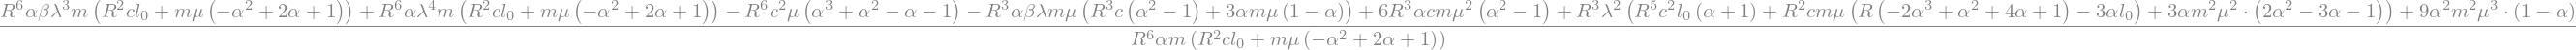

In [22]:
B = sp.Matrix([[-lamda, 1, 0, 0], [- mu / R**3 * (1 - alpha) * (R**3 * c * (alpha + 1) - 3 * alpha * m * mu) / (R**2 * c * l_0 - m * mu * alpha * (alpha - 1) + m * mu * (alpha + 1)), -lamda, 0, 0], [0, 0, -lamda, 1], [0, 0, 3 * mu / R**3 - c / m * (alpha + 1) / alpha, -beta - lamda]])
sp.simplify(sp.collect(sp.collect(sp.collect(sp.collect(sp.collect(sp.collect(sp.collect(sp.expand(B.det()), lamda), R), m), mu), alpha), c), alpha))

## Моделирование 

В ходе численного решения уравнений движения были опробированны несколько интеграторов, классический RK4 оказался не самым оптимальным и в конечном итоге выбор пал на Radau, т.к. он полностью неявный и предоставляет возможность решения жестких систем с приемлемой точностью и временем расчета. 

При расчете были использованы следующие параметры: суммарная масса спутника $m \sim 6 \; кг$, жесткость пружины $c = 60 \;Н/м$, коэффициент трения $\beta = 3500$, начальный углол возмущения $\varphi_0 = \dfrac{\pi}{3}$, длина пружины в нерастянутом состоянии $l_0 = 0.4$  

1) $\alpha = 1$ 

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def odeint(m, c, beta, alpha, l_0, phi_0):
    G = 6.6743e-11
    M = 5.972e24
    mu = G * M
    R = 6371000 + 400000
    Omega = (mu / R**3)**0.5
    Per = 2 * np.pi / Omega

    T = 250000
    x_0 = np.array([phi_0, 0, 2 * l_0, 0])
    t_0 = 0
    t_e = T
    t = np.linspace(0, T, 1000000)

    def right_part(t, x):
        right_part = np.zeros(4)
        right_part[0] = x[1]
        right_part[1] = - 2 * x[3] * x[1] / x[2] - mu / R**2 * alpha * (1 - alpha**2) / (alpha + 1) * np.sin(x[0]) / x[2] - mu / R**3 * np.sin(2 * x[0])
        right_part[2] = x[3]
        right_part[3] = x[1]**2 * x[2] + mu / R**2 * alpha * (1 - alpha**2) / (alpha + 1) * np.cos(x[0]) + 2 * mu / R**3 * x[2] * np.cos(x[0])**2 + mu / R**3 * x[2] - c / m * (x[2] + x[2] / alpha - l_0) + m * (alpha + 1) * mu / R**2 * np.cos(x[0]) - beta * x[3]
        return right_part

    x = solve_ivp(right_part, [t_0, t_e], x_0, t_eval = t, method = 'Radau')
    t = t / Per
    plt.plot(t, x.y[0] * 180 / np.pi)
    plt.xlabel(r'$t, per$')
    plt.ylabel(r'$\varphi, grad$')
    plt.title(r'Зависимость угла отклонения от времени для соотношения масс $\alpha = 1/2$')
    plt.show()
    plt.plot(t, x.y[2])
    plt.xlabel(r'$t, per$')
    plt.ylabel(r'$\xi, m$')
    plt.title(r'Зависимость длины пружины от времени для соотношения масс $\alpha = 1/2$')
    plt.show()

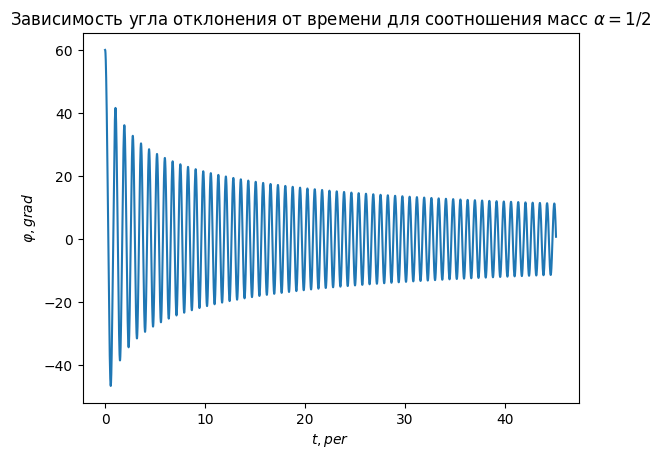

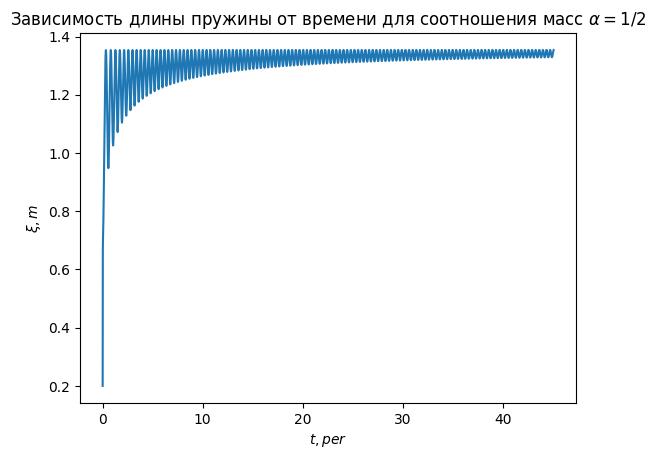

In [19]:
odeint(3, 60, 1500, 1, 0.1, np.pi / 3)

2) $\alpha = \dfrac{1}{12}$

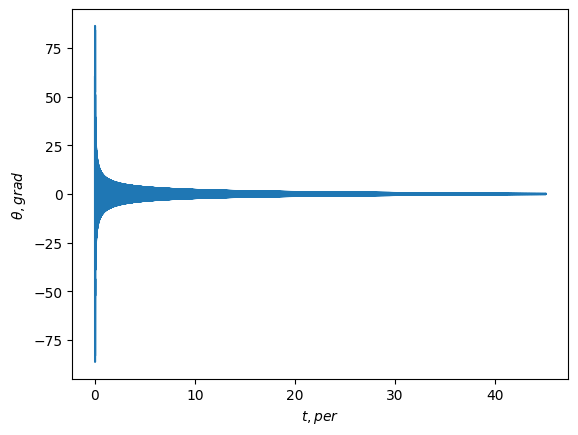

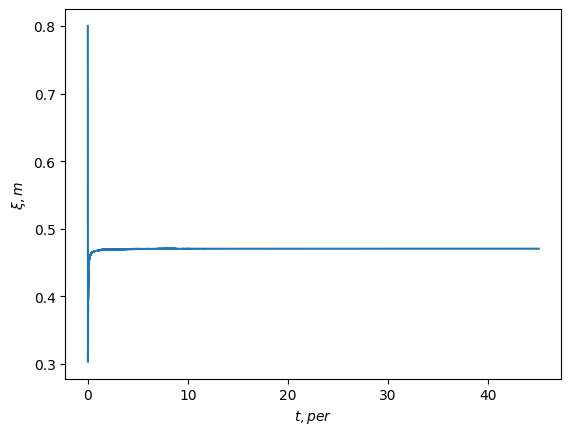

In [10]:
odeint(6, 60, 3500, 1 / 12, 0.4, np.pi / 3)